In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [11]:
df = pd.read_excel('bank-additional-full.xlsx')
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

 ## EDA and data preparation

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [12]:
df.drop(['month','day_of_week'], axis=1 , inplace= True)
##### months and days should not affect the prediction
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

13


In [13]:
cat_columns = df.select_dtypes(include=['object']).columns
num_columns = df.select_dtypes(include =['int64','float64'] )

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41175 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41175 non-null  int64  
 1   job             41175 non-null  object 
 2   marital         41175 non-null  object 
 3   education       41175 non-null  object 
 4   default         41175 non-null  object 
 5   housing         41175 non-null  object 
 6   loan            41175 non-null  object 
 7   contact         41175 non-null  object 
 8   duration        41175 non-null  int64  
 9   campaign        41175 non-null  int64  
 10  pdays           41175 non-null  int64  
 11  previous        41175 non-null  int64  
 12  poutcome        41175 non-null  object 
 13  emp.var.rate    41175 non-null  float64
 14  cons.price.idx  41175 non-null  float64
 15  cons.conf.idx   41175 non-null  float64
 16  euribor3m       41175 non-null  float64
 17  nr.employed     41175 non-null  floa

In [15]:
for column in cat_columns:
    print("Column:", column," \tValues:", df[column].unique())

Column: job  	Values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Column: marital  	Values: ['married' 'single' 'divorced' 'unknown']
Column: education  	Values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Column: default  	Values: ['no' 'unknown' 'yes']
Column: housing  	Values: ['no' 'yes' 'unknown']
Column: loan  	Values: ['no' 'yes' 'unknown']
Column: contact  	Values: ['telephone' 'cellular']
Column: poutcome  	Values: ['nonexistent' 'failure' 'success']
Column: y  	Values: ['no' 'yes']


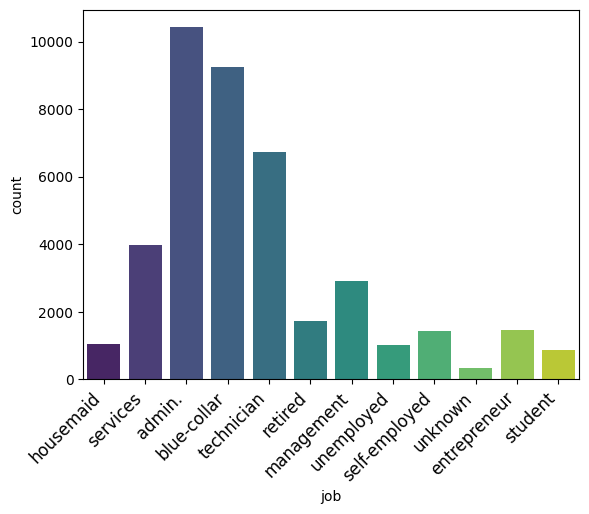

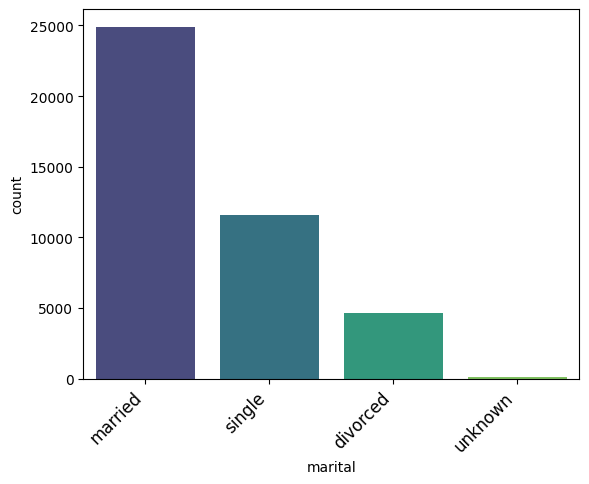

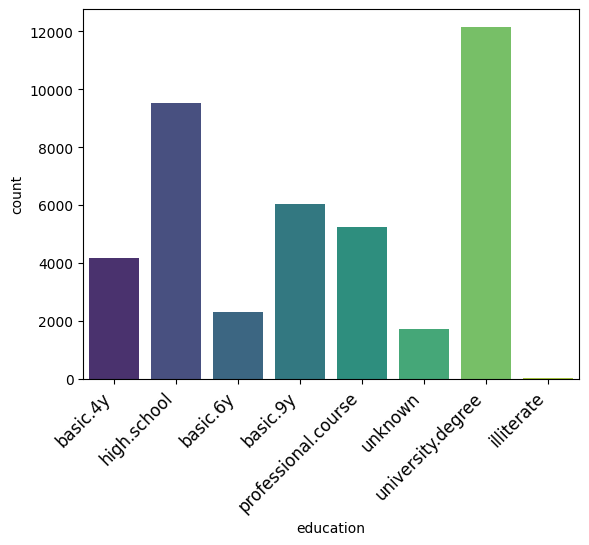

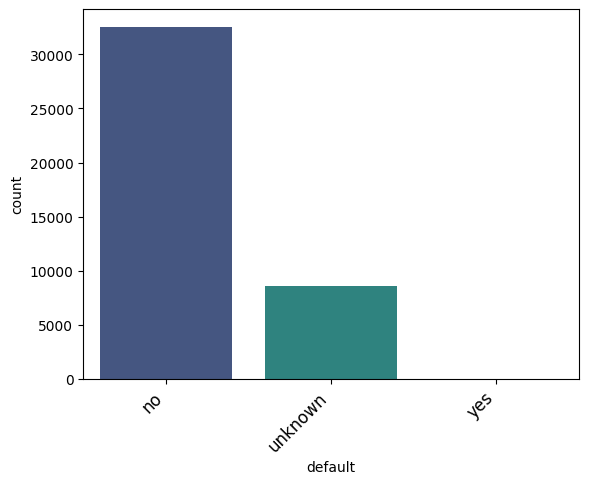

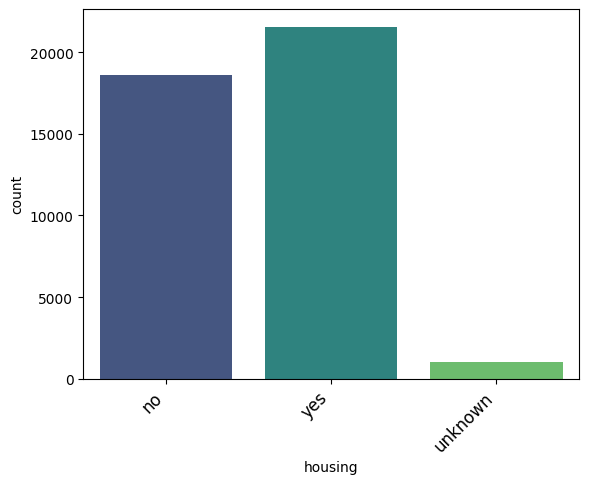

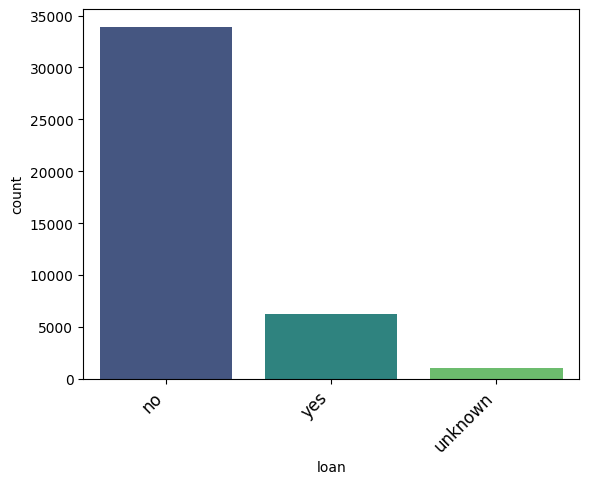

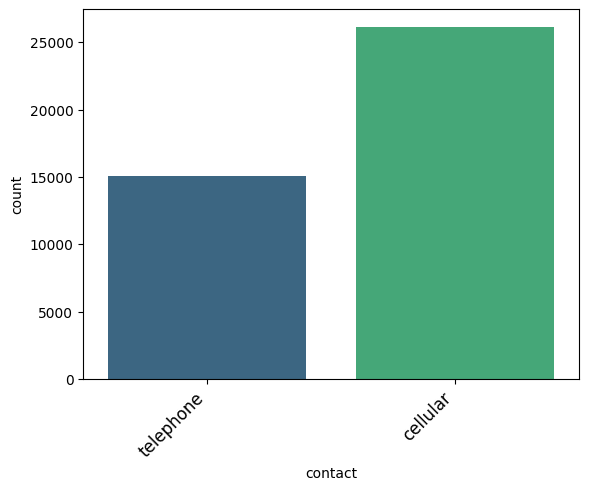

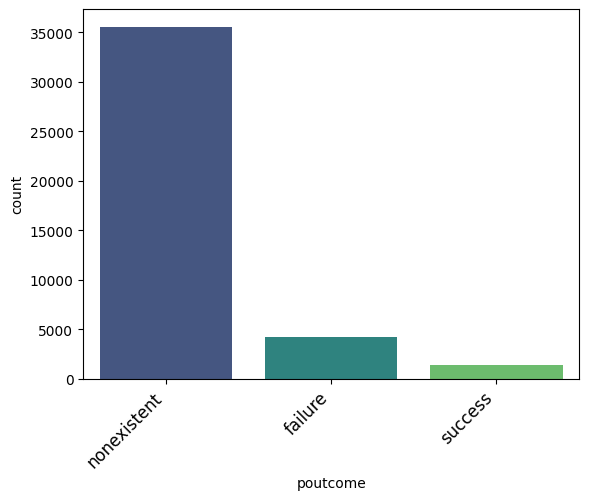

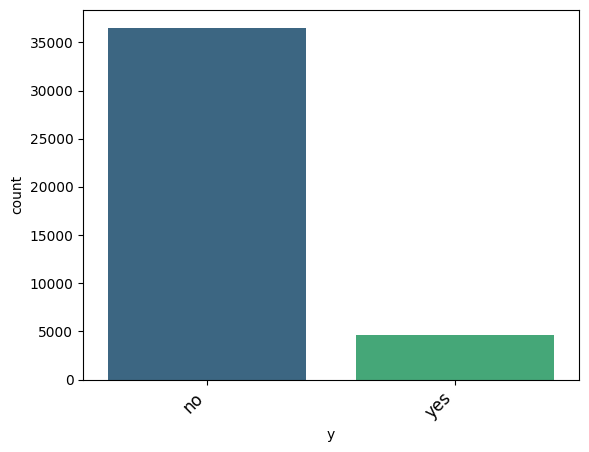

In [16]:
for i in cat_columns:
    sns.countplot(x=i, data=df, palette='viridis')
    plt.xticks(rotation=45, ha='right', fontsize=12)

    plt.show()
    


histogram for column:  age


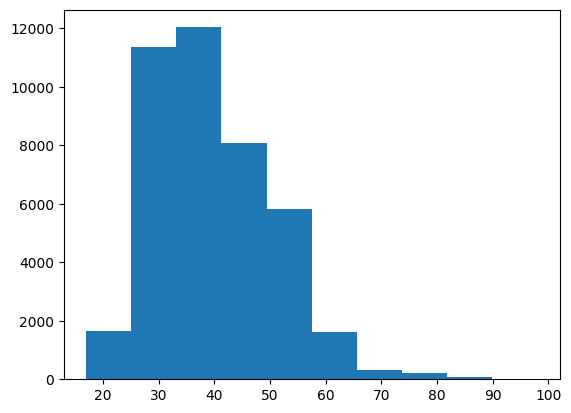

histogram for column:  duration


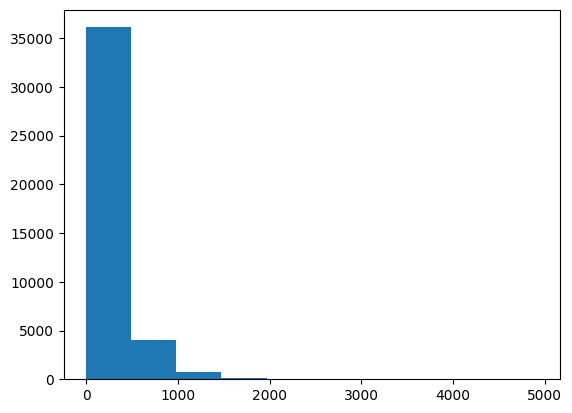

histogram for column:  campaign


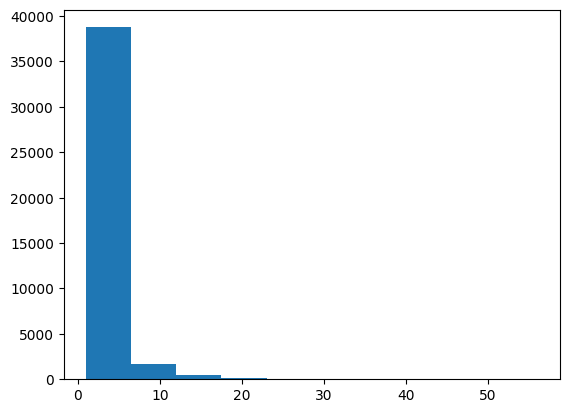

histogram for column:  pdays


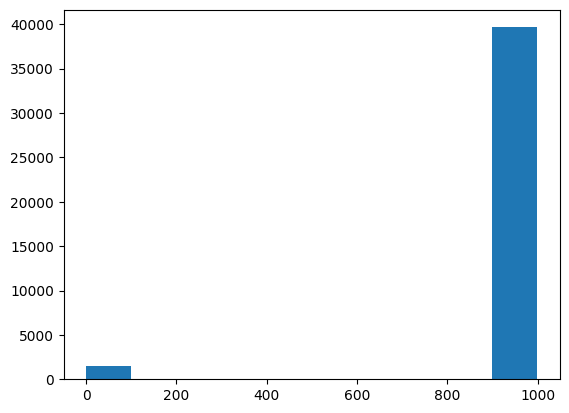

histogram for column:  previous


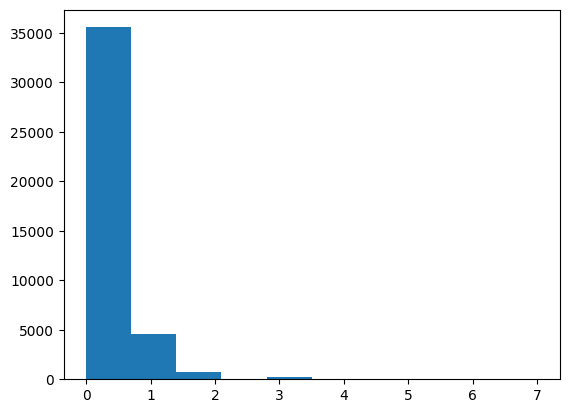

histogram for column:  emp.var.rate


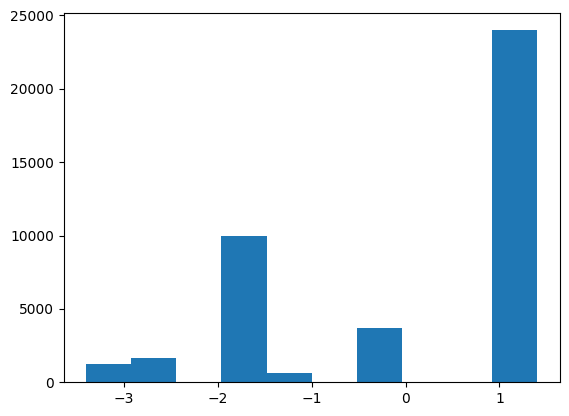

histogram for column:  cons.price.idx


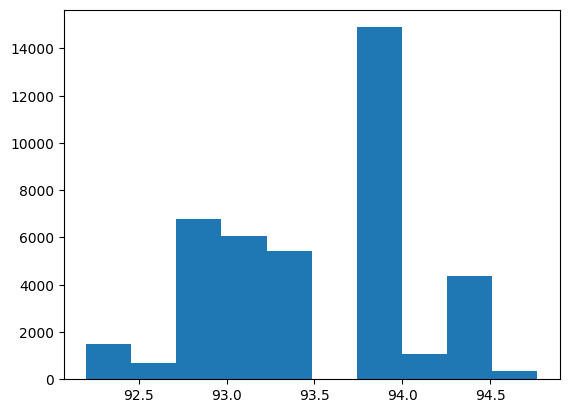

histogram for column:  cons.conf.idx


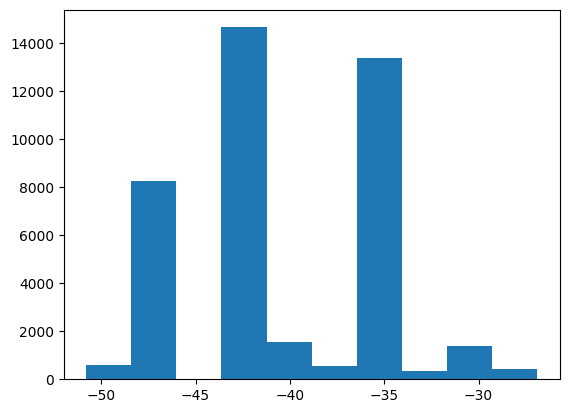

histogram for column:  euribor3m


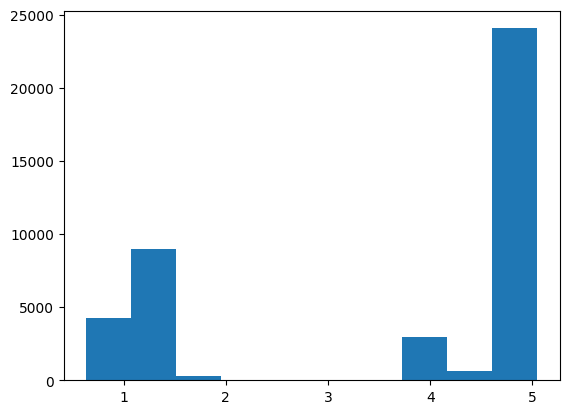

histogram for column:  nr.employed


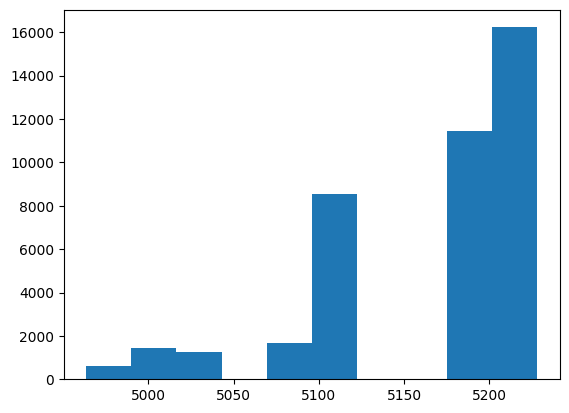

In [17]:
for i in num_columns:
    print('histogram for column: ', i)
    plt.hist(df[i])
    plt.show()

## preprocessing the data 

In [18]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df['contact'] = le.fit_transform(df['contact'])
df['y'] = le.fit_transform(df['y'])

In [19]:
df1 = df.copy()

In [20]:
x = df1.drop('y', axis =1)
y = df1['y']

In [21]:
x= pd.get_dummies(x, drop_first=True)
print(x.shape)
x.head()

(41175, 40)


,age,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,poutcome_nonexistent,poutcome_success
0,56,1,261,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,False,False,False,False,False,True,False
1,57,1,149,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,True,False,False,False,False,False,True,False
2,37,1,226,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,False,False,True,False,False,True,False
3,40,1,151,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,False,False,False,False,False,True,False
4,56,1,307,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,False,False,False,False,True,True,False


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#x = df1.drop('y', axis =1)
#y = df1['y']

x_columns = x.columns

x = scaler.fit_transform(x)

x = pd.DataFrame(x , columns= [x_columns])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


In [23]:
x_train.head()

,age,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,poutcome_nonexistent,poutcome_success
32865,-0.194199,1.318218,-0.348313,0.155969,0.195446,-0.349556,-1.197993,-1.179454,-1.231042,-1.338923,...,-0.647525,-0.209424,1.946940,-0.008536,-0.156959,-1.048969,-0.156959,-0.422951,0.397779,-0.18573
8389,-0.194199,1.318218,-0.047508,-0.205002,0.195446,-0.349556,0.839089,1.536344,-0.280270,0.716512,...,-0.647525,-0.209424,-0.513626,-0.008536,-0.156959,-1.048969,-0.156959,2.364341,0.397779,-0.18573
4532,0.573507,1.318218,1.792028,-0.205002,0.195446,-0.349556,0.648112,0.722641,0.886587,0.711899,...,-0.647525,-0.209424,-0.513626,-0.008536,-0.156959,0.953317,-0.156959,-0.422951,0.397779,-0.18573
39573,-0.769979,-0.758600,-0.271184,-0.205002,0.195446,-0.349556,-1.197993,0.518784,0.108683,-1.700426,...,-0.647525,4.774995,-0.513626,-0.008536,-0.156959,0.953317,-0.156959,-0.422951,0.397779,-0.18573
20054,0.957361,-0.758600,-0.595127,-0.565972,0.195446,-0.349556,0.839089,-0.227543,0.951413,0.774744,...,-0.647525,-0.209424,-0.513626,-0.008536,-0.156959,-1.048969,-0.156959,-0.422951,0.397779,-0.18573


In [24]:
x_train.shape

(30881, 40)

### Neural Network Development by tensorflow

In [70]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model= Sequential()
model.add(layers.Dense(32,activation='sigmoid', input_shape=(40,)))
model.add(layers.Dense(32,activation='sigmoid'))
model.add(layers.Dense(1, activation='linear'))
model.summary()
#input_shape=(40,)

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 32)                  │           1,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,401 (9.38 KB)

 Trainable params: 2,401 (9.38 KB)

 Non-trainable params: 0 (0.00 B)

### Training

In [104]:
model.compile(optimizer='sgd',loss= 'mean_squared_error')
history = model.fit(x_train,y_train , validation_data=(x_test,y_test) , epochs= 10)

Epoch 1/10
966/966 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0661 - val_loss: 0.0991
Epoch 2/10
966/966 ━━━━━━━━━━━━━━━━━━━━ 1s 866us/step - loss: 0.0666 - val_loss: 0.0660
Epoch 3/10
966/966 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step - loss: 0.0656 - val_loss: 0.0756
Epoch 4/10
966/966 ━━━━━━━━━━━━━━━━━━━━ 1s 798us/step - loss: 0.0654 - val_loss: 0.0656
Epoch 5/10
966/966 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - loss: 0.0652 - val_loss: 0.0830
Epoch 6/10
966/966 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step - loss: 0.0651 - val_loss: 0.0658
Epoch 7/10
966/966 ━━━━━━━━━━━━━━━━━━━━ 1s 846us/step - loss: 0.0648 - val_loss: 0.0853
Epoch 8/10
966/966 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - loss: 0.0668 - val_loss: 0.0772
Epoch 9/10
966/966 ━━━━━━━━━━━━━━━━━━━━ 1s 819us/step - loss: 0.0657 - val_loss: 0.0656
Epoch 10/10
966/966 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - loss: 0.0648 - val_loss: 0.0656


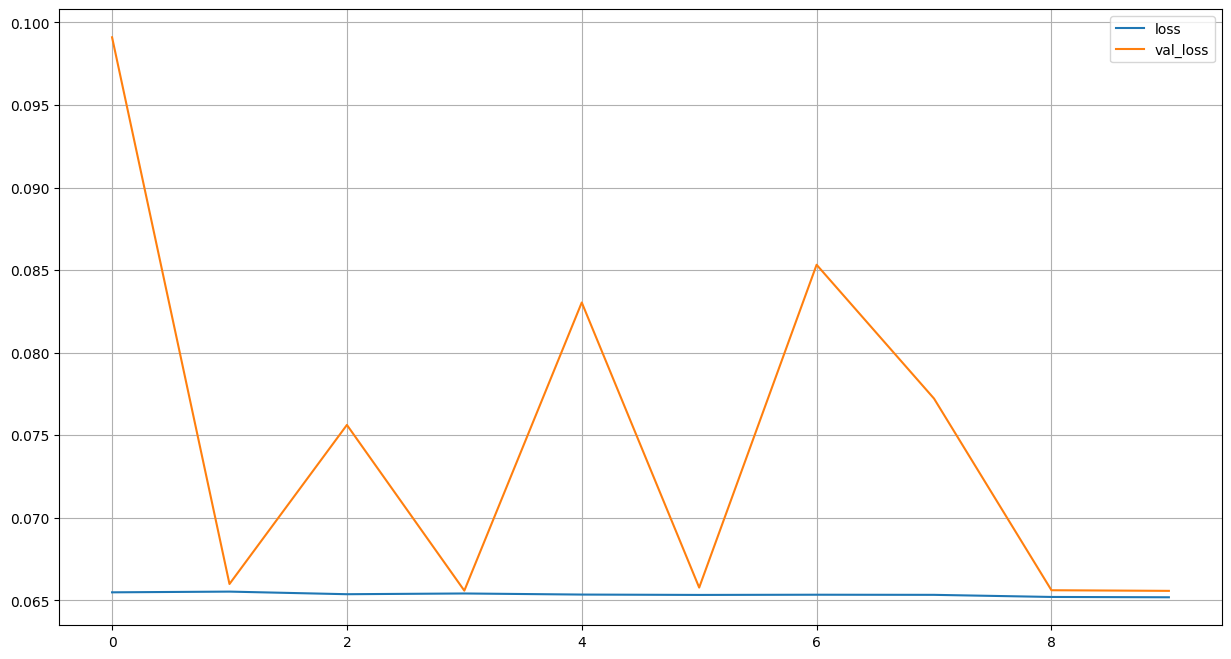

In [105]:
pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
#plt.gca().set_ylim(0,1)
plt.show()

## evaluation

In [106]:
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - loss: 0.0638
test loss, test acc: 0.06557346135377884


### testing

In [107]:
preds= model.predict(x_test)


322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step


In [108]:
preds

array([[ 0.01798   ],
       [ 0.31682235],
       [-0.04799258],
       ...,
       [ 0.01482502],
       [ 0.14187017],
       [ 0.0805508 ]], dtype=float32)

In [41]:
type(preds)

numpy.ndarray

In [90]:
res = pd.DataFrame()
res['actual']= y_test.values
res['predictions']= preds

In [91]:
(res['predictions'] ==0.5).sum()

0

In [92]:
res['binary_predictions'] = res['predictions'].apply(lambda x: 1 if x >= 0.5 else 0)


In [93]:
res_final = res.drop(columns=['predictions'],axis =1)


In [94]:
res_final['result'] = res_final['actual'] == res_final['binary_predictions']

In [95]:
res_final

,actual,binary_predictions,result
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True
...,...,...,...
10289,0,0,True
10290,1,1,True
10291,0,0,True
10292,0,0,True


### efficiency

In [115]:
res_final['result'].value_counts(normalize= True) * 100

result
True     90.489606
False     9.510394
Name: proportion, dtype: float64

##### the efficiency of the model  is about 91%

#### confusion matrix

In [118]:
confusion_matrix = tf.math.confusion_matrix(res_final['actual'],res_final['binary_predictions'])

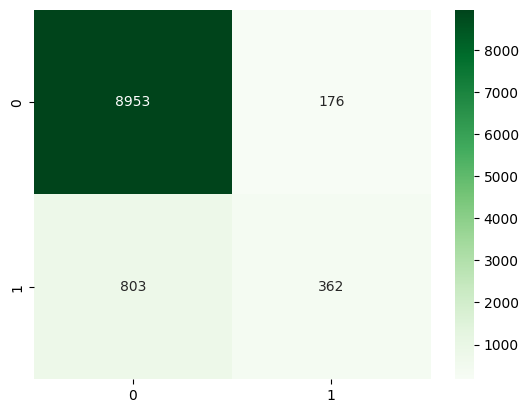

In [119]:
fig = sns.heatmap(confusion_matrix , annot = True , fmt = 'g', cmap = 'Greens')
